## Diamonds
https://www.kaggle.com/shivam2503/diamonds

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diamonds_train.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


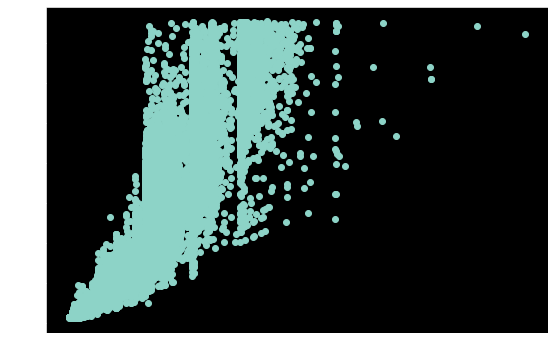

In [3]:
plt.figure(figsize=(9, 6))
plt.style.use('dark_background')
plt.scatter(data['carat'], data['price'])
plt.show()

In [4]:
data['per-carat'] = data['price'] / data['carat']**2

In [5]:
colors = list(set(data['color']))
color_dict = {}
for c in colors:
    color_dict[c] = ord(c) - ord('D')

In [6]:
color_dict

{'J': 6, 'D': 0, 'G': 3, 'F': 2, 'H': 4, 'I': 5, 'E': 1}

In [7]:
set(data['cut'])

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

In [8]:
cut = {'Fair':0, 'Good':1, 'Very Good': 2,  'Premium':3, 'Ideal':4}

In [9]:
set(data['clarity'])

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

In [10]:
clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1': 6, 'IF':6}

In [11]:
data['_cut'] = [ cut[c] for c in data['cut']]
data['_color'] = [ color_dict[c] for c in data['color']]
data['_clarity'] = [ clarity[c] for c in data['clarity']]
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,per-carat,_cut,_color,_clarity
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,6162.570888,4,1,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,7392.290249,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,6181.474480,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3971.462545,3,5,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3485.952133,1,6,1


In [12]:
y = data['per-carat'].values
X = data[['_cut', '_color', '_clarity', 'carat', 'x', 'y', 'z']].values.T
X = np.vstack([np.ones(len(y)), X])
X[:,:5]

array([[1.  , 1.  , 1.  , 1.  , 1.  ],
       [4.  , 3.  , 1.  , 3.  , 1.  ],
       [1.  , 1.  , 1.  , 5.  , 6.  ],
       [1.  , 2.  , 4.  , 3.  , 1.  ],
       [0.23, 0.21, 0.23, 0.29, 0.31],
       [3.95, 3.89, 4.05, 4.2 , 4.34],
       [3.98, 3.84, 4.07, 4.23, 4.35],
       [2.43, 2.31, 2.31, 2.63, 2.75]])

In [13]:
a = np.linalg.inv(X.dot(X.T)).dot(X).dot(y)
a

array([7273.81304405,  170.36932567, -426.79041394,  743.22827513,
       1045.20674279, -585.24475593,  -46.64703169, -149.82720601])

In [14]:
data['predict'] = X.T.dot(a) * X[4, :]**2

In [15]:
(np.abs(data['predict'] - data['price']) / (data['predict'] + data['price'])).mean()

0.05967216860688689

/Users/ian/opt/anaconda3/envs/net/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ian/opt/anaconda3/envs/net/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


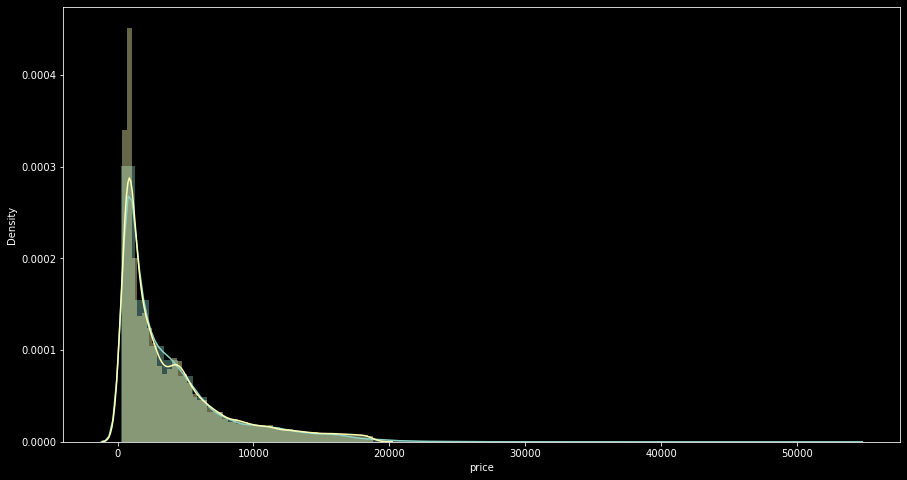

In [16]:
plt.figure(figsize=(15, 8))
plt.style.use('dark_background')
sb.distplot(data['predict'])
sb.distplot(data['price'])
plt.show()

In [82]:
data[['carat', 'price', 'predict']].head()

,carat,price,predict
0,0.23,326,298.920637
1,0.21,326,276.165358
2,0.23,327,387.466425
3,0.29,334,431.800791
4,0.31,335,268.674516


In [53]:
data[['carat', 'price', 'predict']].tail()

,carat,price,predict
48935,0.70,2757,2954.371796
48936,0.72,2757,3129.091576
48937,0.70,2757,2803.695550
48938,0.86,2757,2422.024778
48939,0.75,2757,2953.832426


In [85]:
C = np.linalg.inv(X.dot(X.T))
C

array([[ 5.72017237e-03, -3.60399259e-05, -1.78924634e-05,
        -6.12828163e-05,  2.97750300e-03, -1.16029758e-03,
        -1.85656780e-05, -2.77960644e-04],
       [-3.60399259e-05,  1.72810584e-05, -3.59730440e-08,
        -1.99451361e-06,  9.38401767e-06, -8.68257788e-06,
        -1.01227164e-06,  1.13326954e-05],
       [-1.78924634e-05, -3.59730440e-08,  7.87632935e-06,
        -1.19409737e-06, -1.49344746e-05,  2.57836256e-06,
         3.31231697e-07, -1.01406345e-06],
       [-6.12828163e-05, -1.99451361e-06, -1.19409737e-06,
         1.00201698e-05, -5.31468455e-06,  7.80456409e-06,
        -1.03644033e-06,  1.51801875e-06],
       [ 2.97750300e-03,  9.38401767e-06, -1.49344746e-05,
        -5.31468455e-06,  1.90118213e-03, -6.88887145e-04,
        -1.07711894e-05, -1.29225633e-04],
       [-1.16029758e-03, -8.68257788e-06,  2.57836256e-06,
         7.80456409e-06, -6.88887145e-04,  7.50949782e-04,
        -2.53907447e-04, -3.22929916e-04],
       [-1.85656780e-05, -1.012271

In [140]:
data['residuals'] = data['price'] - data['predict']
data['residuals']

0         27.079363
1         49.834642
2        -60.466425
3        -97.800791
4         66.325484
            ...    
48935   -197.371796
48936   -372.091576
48937    -46.695550
48938    334.975222
48939   -196.832426
Name: residuals, Length: 48940, dtype: float64

In [141]:
SSE = np.sum(np.square(data['residuals']))
SSE

52253005199.85725

In [142]:
n = len(data['price'])
n

48940

In [143]:
p = 8

In [144]:
se = np.sqrt(SSE/(n-p))
se

1033.3778607019747

In [145]:
se_perCarat = np.sqrt(np.square(se)*C[0,0])
se_perCarat

78.15624951173781

In [146]:
se_cut = np.sqrt(np.square(se)*C[1,1])
se_cut

4.295802655283456

In [147]:
se_color = np.sqrt(np.square(se)*C[2,2])
se_color

2.900154181464761

In [148]:
se_clarity = np.sqrt(np.square(se)*C[3,3])
se_clarity

3.2711216370650655

In [149]:
se_carat = np.sqrt(np.square(se)*C[4,4])
se_carat

45.057907018654106

In [150]:
se_x = np.sqrt(np.square(se)*C[5,5])
se_x

28.318131922462644

In [151]:
se_y = np.sqrt(np.square(se)*C[6,6])
se_y

17.57978229898956

In [152]:
se_z = np.sqrt(np.square(se)*C[7,7])
se_z

27.33398698526544